In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("E:\\SampleSuperstore.csv",sep=",")

In [4]:
df.head(5)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.memory_usage(deep=True)

Index              132
Ship Mode       697812
Segment         657979
Country         699580
City            662909
State           654479
Postal Code      79952
Region          618223
Category        697607
Sub-Category    641532
Sales            79952
Quantity         79952
Discount         79952
Profit           79952
dtype: int64

In [9]:
df.duplicated().sum()

17

In [10]:
df=df.drop_duplicates()

In [11]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [12]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [13]:
num=[column for column in df.columns if df[column].dtype!="O"]

In [14]:
floats=[column for column in df.columns if df[column].dtype=="O"]

In [15]:
df['Segment'].value_counts()             

Segment
Consumer       5183
Corporate      3015
Home Office    1779
Name: count, dtype: int64

In [16]:
df['Category'].value_counts()

Category
Office Supplies    6012
Furniture          2118
Technology         1847
Name: count, dtype: int64

In [17]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

<Axes: ylabel='count'>

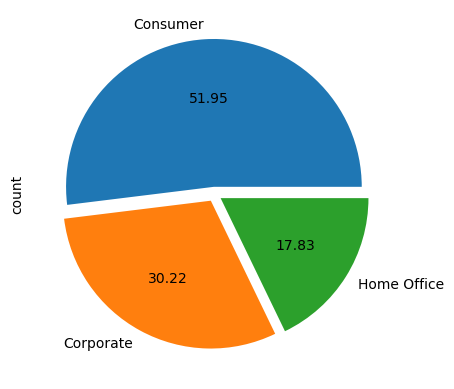

In [18]:
#sns.countplot(['Postal Code'])
df['Segment'].value_counts().plot(kind="pie",autopct='%.2f',explode=(0.05,0.05,0.05))

(array([1395.,  873.,  724.,  805.,  969.,  263.,  619., 1127.,  577.,
        2625.]),
 array([ 1040. , 10866.1, 20692.2, 30518.3, 40344.4, 50170.5, 59996.6,
        69822.7, 79648.8, 89474.9, 99301. ]),
 <BarContainer object of 10 artists>)

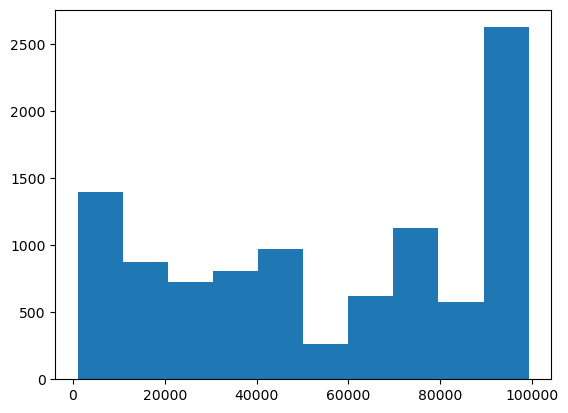

In [19]:
plt.hist(df['Postal Code'])

<Axes: xlabel='Postal Code', ylabel='Density'>

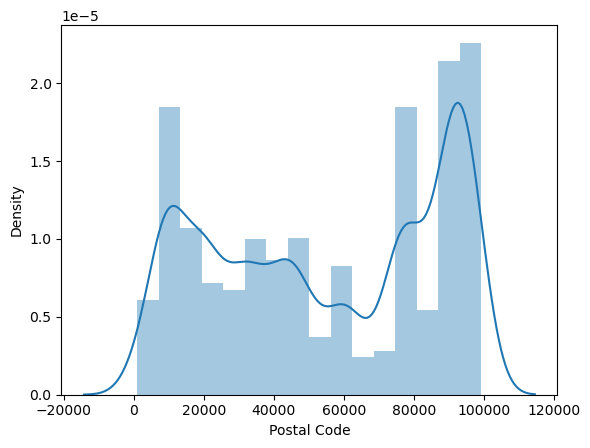

In [20]:
sns.distplot(df['Postal Code'])

(array([1.00e+00, 2.00e+00, 4.00e+00, 3.40e+01, 9.89e+03, 3.50e+01,
        5.00e+00, 4.00e+00, 1.00e+00, 1.00e+00]),
 array([-6599.978 , -5099.9826, -3599.9872, -2099.9918,  -599.9964,
          899.999 ,  2399.9944,  3899.9898,  5399.9852,  6899.9806,
         8399.976 ]),
 <BarContainer object of 10 artists>)

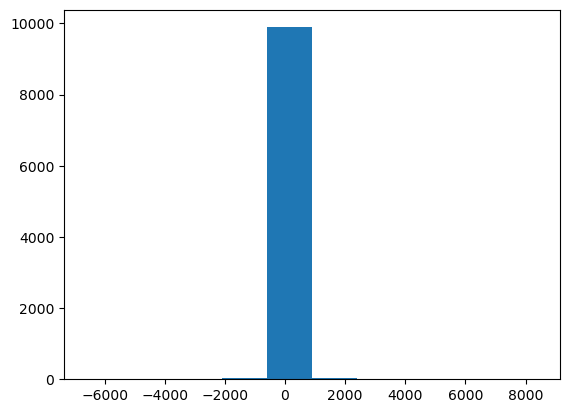

In [21]:
plt.hist(df['Profit'])

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9977.0,55154.964117,32058.266816,1040.000,23223.0000,55901.000,90008.000,99301.000
Sales,9977.0,230.148902,623.721409,0.444,17.3000,54.816,209.970,22638.480
Quantity,9977.0,3.790719,2.226657,1.000,2.0000,3.000,5.000,14.000
Discount,9977.0,0.156278,0.206455,0.000,0.0000,0.200,0.200,0.800
Profit,9977.0,28.690130,234.457840,-6599.978,1.7262,8.671,29.372,8399.976


In [23]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

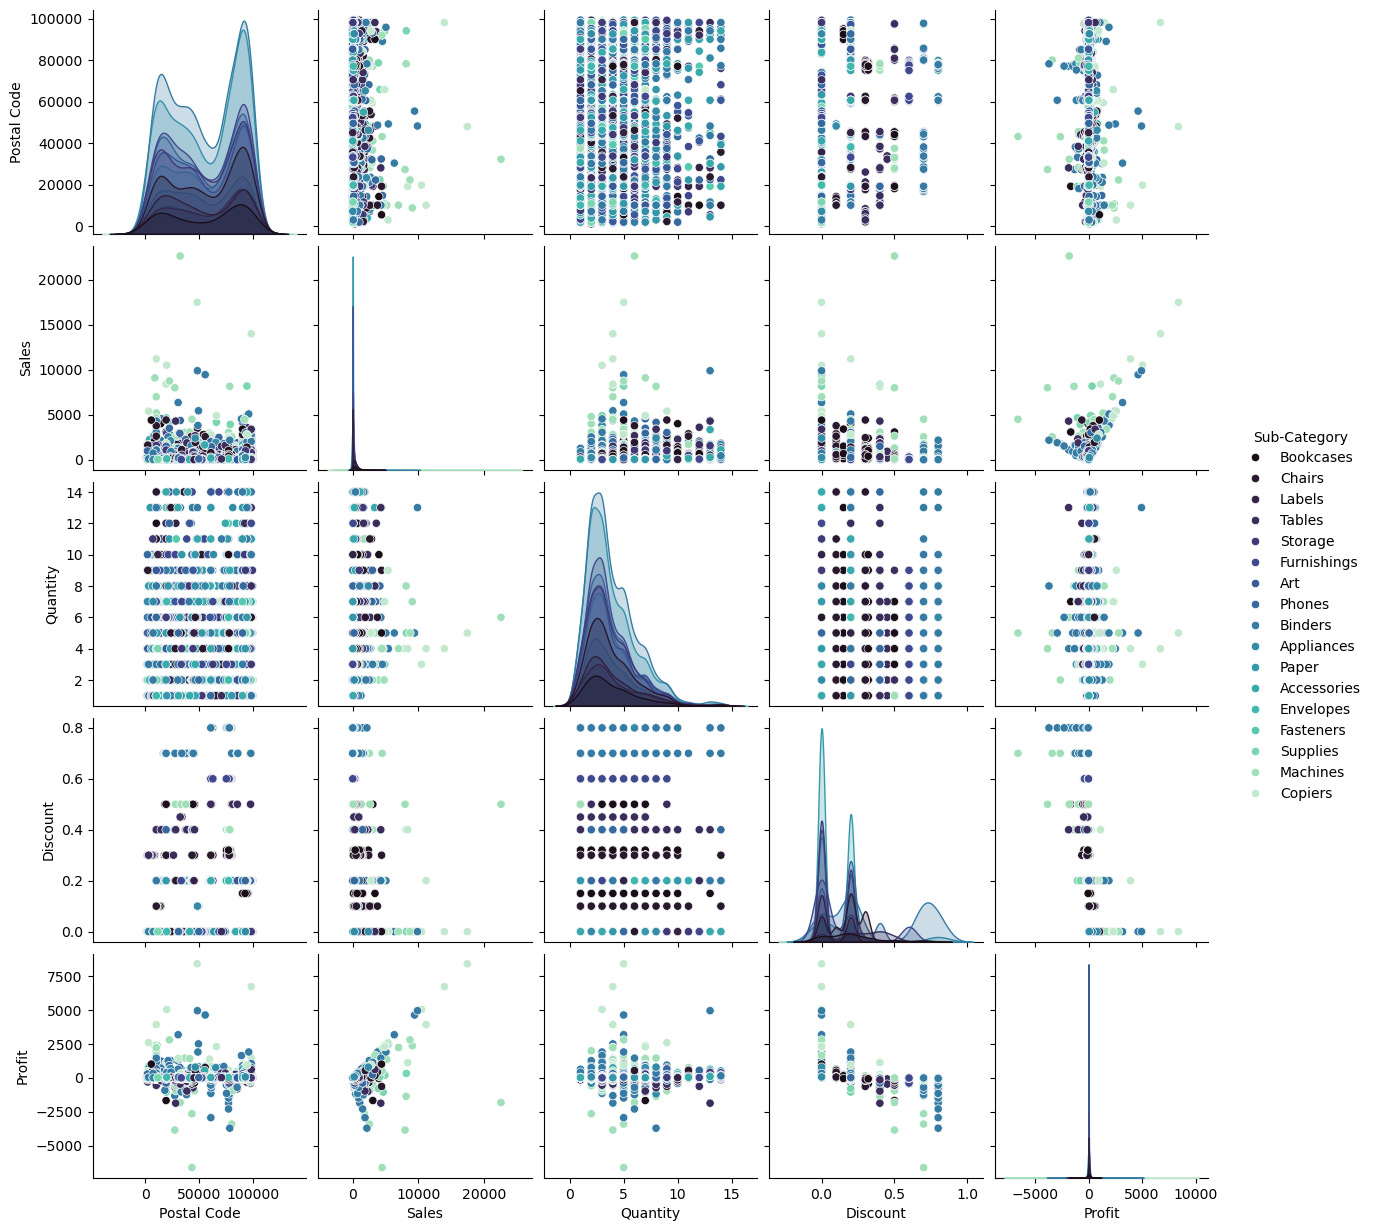

In [24]:
sns.pairplot(df,hue='Sub-Category',diag_kind='kde',palette='mako')

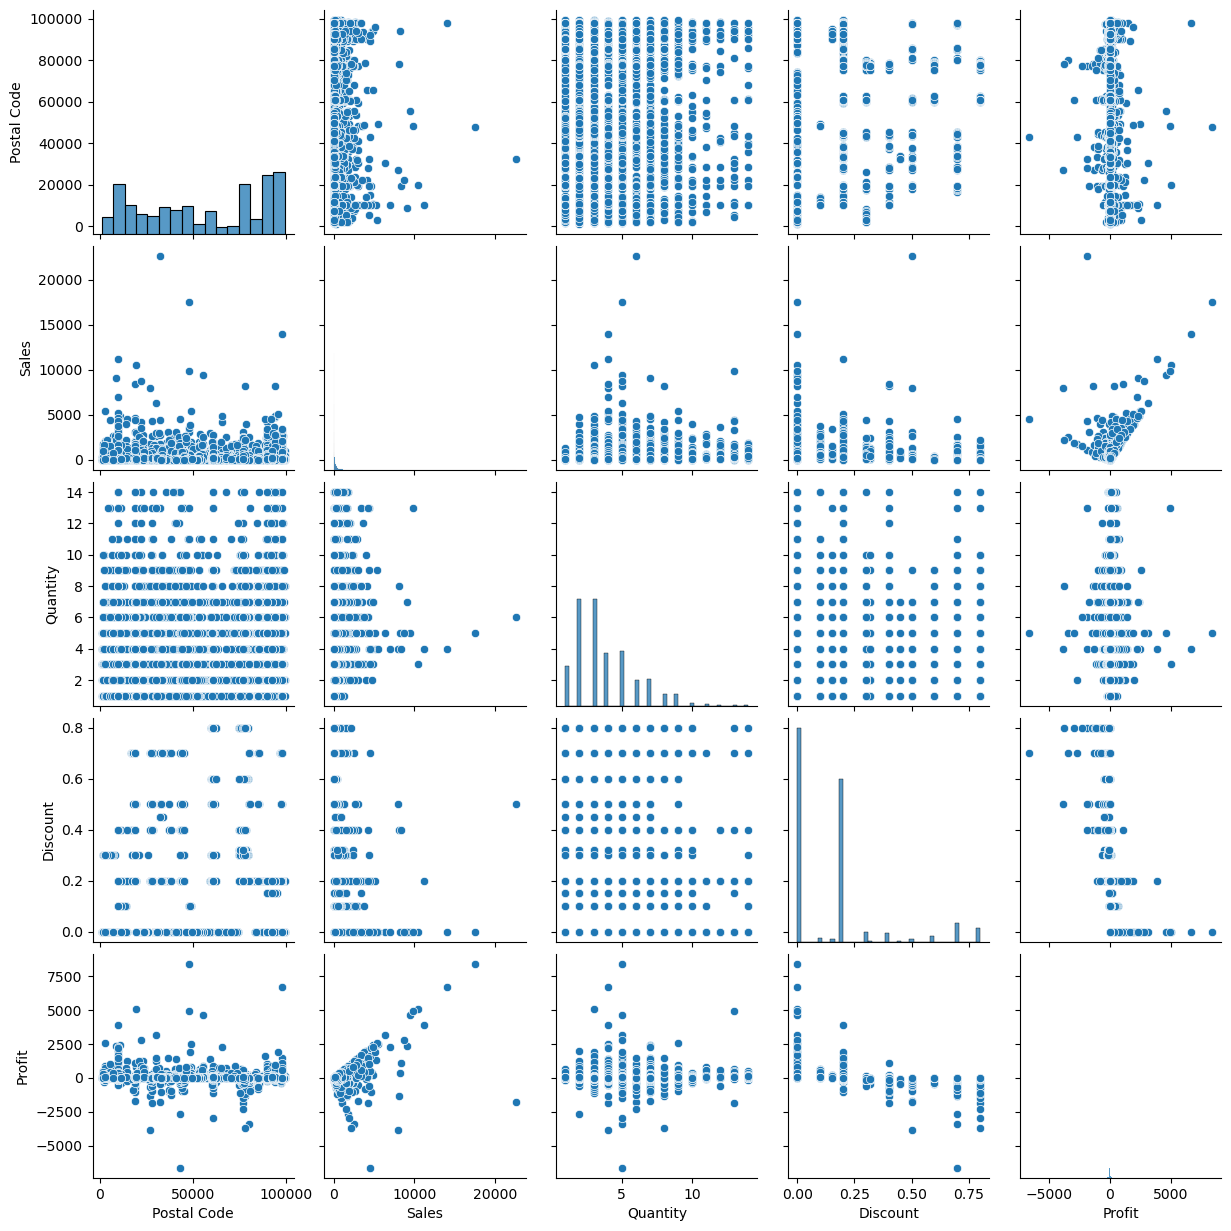

In [25]:
sns.pairplot(df)

<Axes: ylabel='count'>

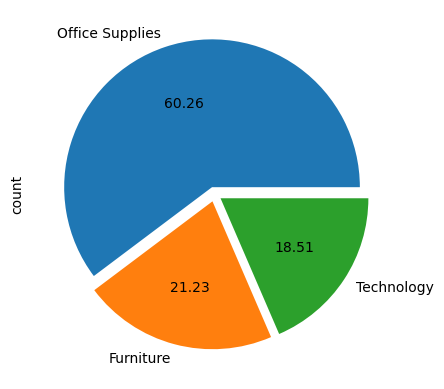

In [29]:
df['Category'].value_counts().plot(kind="pie",autopct='%.2f',explode=(0.05,0.05,0.05))


<Axes: xlabel='Category'>

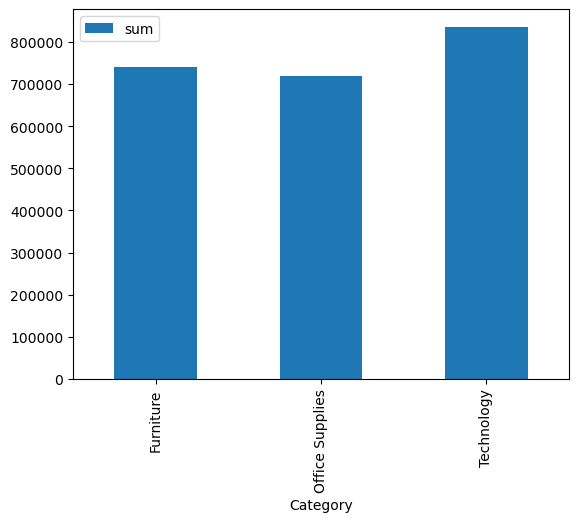

In [30]:
df.groupby('Category')['Sales'].agg(['sum']).plot.bar()

In [31]:
df.groupby('Category').Profit.sum()

Category
Furniture           18421.8137
Office Supplies    122364.6608
Technology         145454.9481
Name: Profit, dtype: float64

In [32]:
df.groupby('Category').Sales.sum()

Category
Furniture          741306.3133
Office Supplies    718735.2440
Technology         836154.0330
Name: Sales, dtype: float64

In [33]:
pd.crosstab(df['Region'],df['Category'])

Category,Furniture,Office Supplies,Technology
Region,,,
Central,480,1419,420
East,600,1710,535
South,332,995,293
West,706,1888,599


<Axes: xlabel='Category', ylabel='Region'>

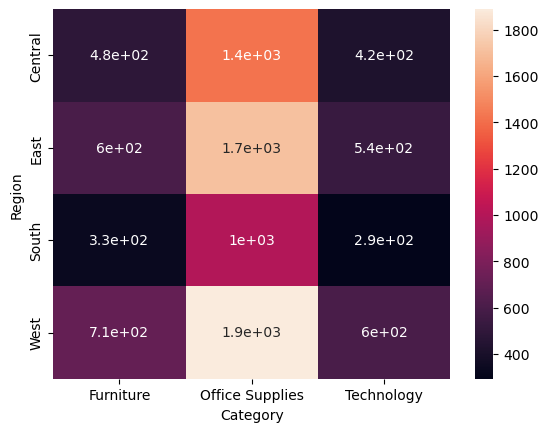

In [45]:
sns.heatmap(pd.crosstab(df['Region'],df['Category']),annot=True)

# Summary

1. First of all we imported all the important libraries.  Then imported the data set.  It had total 994 rows and 13 columns.  Then we checked the NULL value in it and we did not find even a single NULL value in it.  Then we checked how much memory he had.  How many duplicate values are there? So we saw that there were total 17 duplicate values which we fixed, then we checked all the unique values.
2. Then we calculated the value of how many categories are there in the segment.  How many categories are there in categories, how many categories are there in sub categories?And we represented it in the form of a pie chart.
3. Then we created a histogram graph of post codes and a Distic plot graph.  After that we made a histogram of profit of postal code.  After that we saw in describe mathematical in terms.
4. We checked different types of graphs in all sub categories with the help of pairplot graph.
5. We created a pie chart graph of the categories and then created a bar plot graph of the same.  Showing the relationship between categories and sales, we then checked the total profit in Group wise categories.  Then we checked the total sum of sales
6. And lastly we represented cross type graph of region and revolution with the help of heat map.